# Movie plot analysis

#### We will inspect the plot of movies to detect any change in lexical fields with respect to WW2.

In [1]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Load the data
movies = pd.read_pickle('../data/movies.pkl')
plot_summaries = pd.read_pickle('../data/plot_summaries.pkl')

movies_and_plot = pd.merge(left=movies, right=plot_summaries, on='Wikipedia_movie_ID')
movies_and_plot.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,nb_languages,nb_country,nb_genre,Movie_language,FirstLanguage_Name,SecondLanguage_Name,FirstCountry_Name,SecondCountry_Name,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",1,1,7,[English ],English,None,United States of America,None,"Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1,1,3,[English ],English,None,United Kingdom,None,A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,NaN,106.0,"{""/m/04306rv"": ""German Language""}",[Germany],[Drama],1,1,1,[German ],German,None,Germany,None,"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,NaN,86.0,"{""/m/02h40lc"": ""English Language""}",[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",1,1,4,[English ],English,None,South Africa,None,"Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,NaN,93.0,"{""/m/02h40lc"": ""English Language""}",[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1,1,7,[English ],English,None,United States of America,None,"Adam, a San Francisco-based artist who works a..."


#### Let us first analyse the plots in a simple manner. Let us check the number of occurences of key words in plots. 

In [3]:
key_words = ['world war two', 'ww2', 'nazi', 'nazism', 'hitler', 'axis', 'allied', 'dictatorship']

In [4]:
df_plots = movies_and_plot[['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Movie_release_date', 'Plot']]
col_name_of_key_words = ['Count_of_' + '_'.join(word.split(' ')) for word in key_words]

def cust_count(plot_summary, key_word):
    return 1 if plot_summary.lower().count(key_word) > 0 else 0
        

for i in range(len(key_words)):
    df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: cust_count(x, key_word=key_words[i]))

df_plots.head()

C:\Users\mirco\AppData\Local\Temp\ipykernel_21168\2042482976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: cust_count(x, key_word=key_words[i]))
C:\Users\mirco\AppData\Local\Temp\ipykernel_21168\2042482976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plots[col_name_of_key_words[i]] = df_plots['Plot'].apply(lambda x: cust_count(x, key_word=key_words[i]))
C:\Users\mirco\AppData\Local\Temp\ipykernel_21168\2042482976.py:9: Set

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Plot,Count_of_world_war_two,Count_of_ww2,Count_of_nazi,Count_of_nazism,Count_of_hitler,Count_of_axis,Count_of_allied,Count_of_dictatorship
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24 00:00:00+00:00,"Set in the second half of the 22nd century, th...",0,0,0,0,0,0,0,0
1,9363483,/m/0285_cd,White Of The Eye,1987-01-01 00:00:00+00:00,A series of murders of rich young women throug...,0,0,0,0,0,0,0,0
2,261236,/m/01mrr1,A Woman in Flames,1983-01-01 00:00:00+00:00,"Eva, an upper class housewife, becomes frustra...",0,0,0,0,0,0,0,0
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01 00:00:00+00:00,"Every hundred years, the evil Morgana returns...",0,0,0,0,0,0,0,0
4,6631279,/m/0gffwj,Little city,1997-04-04 00:00:00+00:00,"Adam, a San Francisco-based artist who works a...",0,0,0,0,0,0,0,0


In [5]:
df_key_words_occ = df_plots.groupby(by=df_plots['Movie_release_date'].dt.year)[col_name_of_key_words].sum()
df_key_words_occ

,Count_of_world_war_two,Count_of_ww2,Count_of_nazi,Count_of_nazism,Count_of_hitler,Count_of_axis,Count_of_allied,Count_of_dictatorship
Movie_release_date,,,,,,,,
1894.0,0,0,0,0,0,0,0,0
1895.0,0,0,0,0,0,0,0,0
1896.0,0,0,0,0,0,0,0,0
1898.0,0,0,0,0,0,0,0,0
1899.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2010.0,0,0,13,0,4,0,1,1
2011.0,0,0,12,1,6,1,4,0
2012.0,0,0,0,0,0,0,3,1


In [6]:
df_key_words_occ['Count_movies'] = movies_and_plot.groupby(by=movies_and_plot['Movie_release_date'].dt.year)['Wikipedia_movie_ID'].count()
df_key_words_occ

,Count_of_world_war_two,Count_of_ww2,Count_of_nazi,Count_of_nazism,Count_of_hitler,Count_of_axis,Count_of_allied,Count_of_dictatorship,Count_movies
Movie_release_date,,,,,,,,,
1894.0,0,0,0,0,0,0,0,0,2
1895.0,0,0,0,0,0,0,0,0,1
1896.0,0,0,0,0,0,0,0,0,3
1898.0,0,0,0,0,0,0,0,0,5
1899.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2010.0,0,0,13,0,4,0,1,1,1060
2011.0,0,0,12,1,6,1,4,0,784
2012.0,0,0,0,0,0,0,3,1,530


Text(0, 0.38, 'Number of occurences of the word')

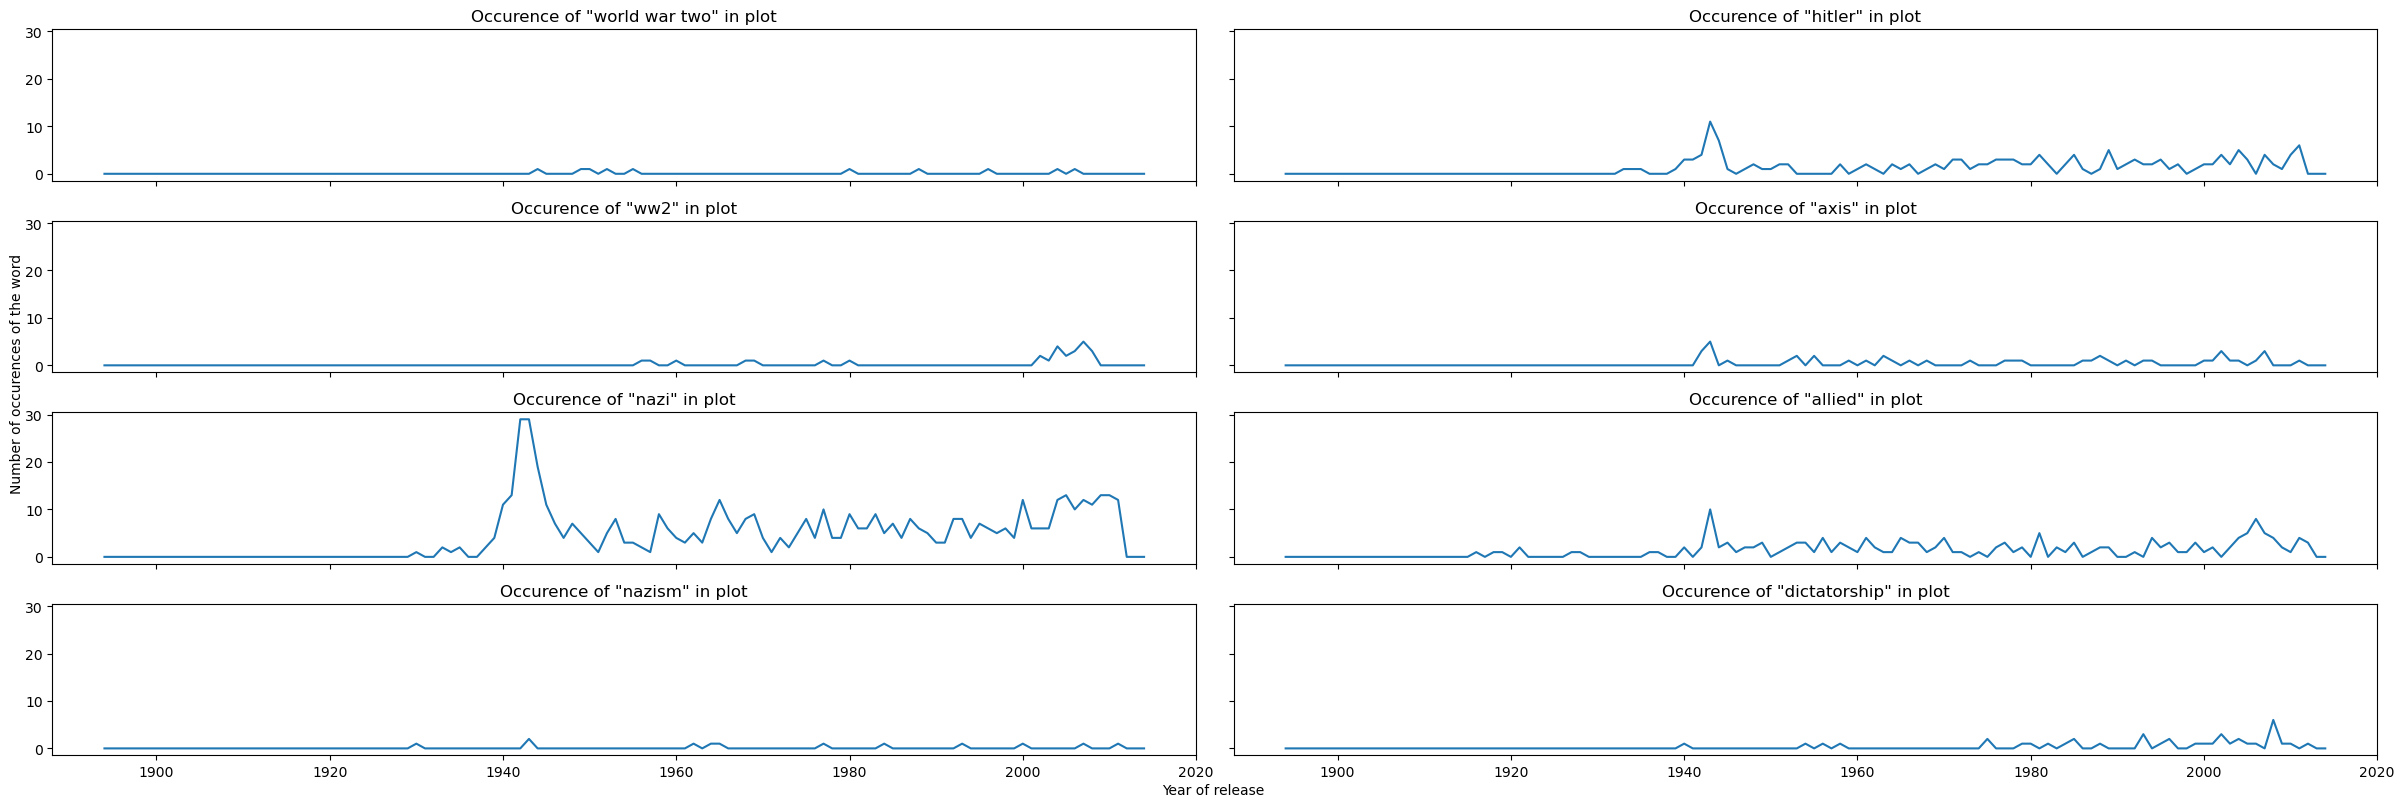

In [7]:
fig, ax = plt.subplots(math.ceil(len(key_words)/2), 2, figsize= (math.ceil(len(key_words)/2)*6, 8), sharey = True, sharex = True)

for i in range(len(key_words)):
    sbplt = ax[i%math.ceil(len(key_words)/2), math.floor(i/math.ceil(len(key_words)/2))]
    col_name = col_name_of_key_words[i]

    sbplt.plot(df_key_words_occ[col_name])
    sbplt.set_title('Occurence of "' + key_words[i] + '" in plot')
    
if (len(key_words) % 2 != 0):
    fig.delaxes(ax[math.floor(len(key_words)/2), 1])

fig.tight_layout()

fig.text(0.48,0, "Year of release")
fig.text(0,0.38, "Number of occurences of the word", rotation = 90)


#### Now by percentage 

In [8]:
df_key_words_occ_i = df_key_words_occ.reset_index()
df_key_words_occ_before = df_key_words_occ_i[(1929 <= df_key_words_occ_i['Movie_release_date']) * (df_key_words_occ_i['Movie_release_date'] < 1940) == 1]
df_key_words_occ_after = df_key_words_occ_i[(1940 <= df_key_words_occ_i['Movie_release_date'])  * (df_key_words_occ_i['Movie_release_date'] <= 1949) == 1]

In [9]:
df_key_words_occ_after

,Movie_release_date,Count_of_world_war_two,Count_of_ww2,Count_of_nazi,Count_of_nazism,Count_of_hitler,Count_of_axis,Count_of_allied,Count_of_dictatorship,Count_movies
41,1940.0,0,0,11,0,3,0,2,1,176
42,1941.0,0,0,13,0,3,0,0,0,196
43,1942.0,0,0,29,0,4,3,2,0,192
44,1943.0,0,0,29,2,11,5,10,0,181
45,1944.0,1,0,19,0,7,0,2,0,179
46,1945.0,0,0,11,0,1,1,3,0,167
47,1946.0,0,0,7,0,0,0,1,0,169
48,1947.0,0,0,4,0,1,0,2,0,186
49,1948.0,0,0,7,0,2,0,2,0,211
50,1949.0,1,0,5,0,1,0,3,0,231


In [10]:
df_key_words_occ_before

,Movie_release_date,Count_of_world_war_two,Count_of_ww2,Count_of_nazi,Count_of_nazism,Count_of_hitler,Count_of_axis,Count_of_allied,Count_of_dictatorship,Count_movies
30,1929.0,0,0,0,0,0,0,0,0,90
31,1930.0,0,0,1,1,0,0,0,0,109
32,1931.0,0,0,0,0,0,0,0,0,145
33,1932.0,0,0,0,0,0,0,0,0,175
34,1933.0,0,0,2,0,1,0,0,0,154
35,1934.0,0,0,1,0,1,0,0,0,171
36,1935.0,0,0,2,0,1,0,0,0,192
37,1936.0,0,0,0,0,0,0,1,0,192
38,1937.0,0,0,0,0,0,0,1,0,192
39,1938.0,0,0,2,0,0,0,0,0,172


In [11]:
df_key_words_occ_comp = pd.DataFrame(data={
    '1935-1945': df_key_words_occ_before.sum() / df_key_words_occ_before['Count_movies'].sum(),
    '1946-1956': df_key_words_occ_after.sum() / df_key_words_occ_after['Count_movies'].sum()
    })

df_key_words_occ_comp.drop(['Movie_release_date', 'Count_movies']).map(lambda x: str(round(x*100, 3)) + '%')

,1935-1945,1946-1956
Count_of_world_war_two,0.0%,0.106%
Count_of_ww2,0.0%,0.0%
Count_of_nazi,0.676%,7.15%
Count_of_nazism,0.056%,0.106%
Count_of_hitler,0.225%,1.748%
Count_of_axis,0.0%,0.477%
Count_of_allied,0.113%,1.43%
Count_of_dictatorship,0.0%,0.053%


It is interesting to see that for the word "plane", it is less used after 9/11 than before, even though you would expect to have more.